<a href="https://colab.research.google.com/github/EstevaoXavier/analisando_vendas_pandas/blob/main/analise_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pré Análise**

In [36]:
import pandas as pd

In [37]:
#importando o arquivo
df = pd.read_excel('Vendas.xlsx')

In [38]:
#renomeando as colunas
df=df.rename(columns={'Código Venda':'codigo_venda'})
df=df.rename(columns={'Data':'data'})
df=df.rename(columns={'ID Loja':'id_loja'})
df=df.rename(columns={'Produto':'produto'})
df=df.rename(columns={'Quantidade':'quantidade'})
df=df.rename(columns={'Valor Unitário':'valor_unitario'})
df=df.rename(columns={'Valor Final':'valor_final'})
df


,codigo_venda,data,id_loja,produto,quantidade,valor_unitario,valor_final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
93905,65012,2019-11-30,Shopping Vila Velha,Mochila Xadrez,2,283,566
93906,65013,2019-11-30,Ribeirão Shopping,Pulseira Listrado,2,79,158
93907,65013,2019-11-30,Ribeirão Shopping,Cueca Listrado,3,67,201
93908,65014,2019-11-30,Shopping Morumbi,Pulseira Linho,5,114,570


In [41]:
#separando as colunas em séries
dfcodigo_venda = df['codigo_venda']
dfdata = df['data']
dfloja = df['id_loja']
dfproduto = df['produto']
dfquantidade = df['quantidade']
dfvalor_unitario = df['valor_unitario']
dfvalor_final = df['valor_final']

In [40]:
df.loc[9,'valor_final']

105

In [42]:
dfdata = pd.to_datetime(dfdata, format='%m/%d/%Y')
dfdata

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-02
4       2019-01-02
           ...    
93905   2019-11-30
93906   2019-11-30
93907   2019-11-30
93908   2019-11-30
93909   2019-11-30
Name: data, Length: 93910, dtype: datetime64[ns]

In [43]:
dfvalor_final

0         358
1         360
2         368
3         600
4          71
         ... 
93905     566
93906     158
93907     201
93908     570
93909    1036
Name: valor_final, Length: 93910, dtype: int64

#**Análises**

##As Lojas que mais Vendem

In [52]:
#pegando as 10 lojas que mais vendem
graf_dados = df.groupby('id_loja').count().valor_final.sort_values(ascending=False).head(10)
graf_dados

id_loja
Shopping Vila Velha                 3935
Norte Shopping                      3924
Palladium Shopping Curitiba         3909
Shopping Center Leste Aricanduva    3863
Bourbon Shopping SP                 3830
Rio Mar Shopping Fortaleza          3824
Novo Shopping Ribeirão Preto        3810
Shopping SP Market                  3808
Iguatemi Campinas                   3793
Shopping Ibirapuera                 3778
Name: valor_final, dtype: int64

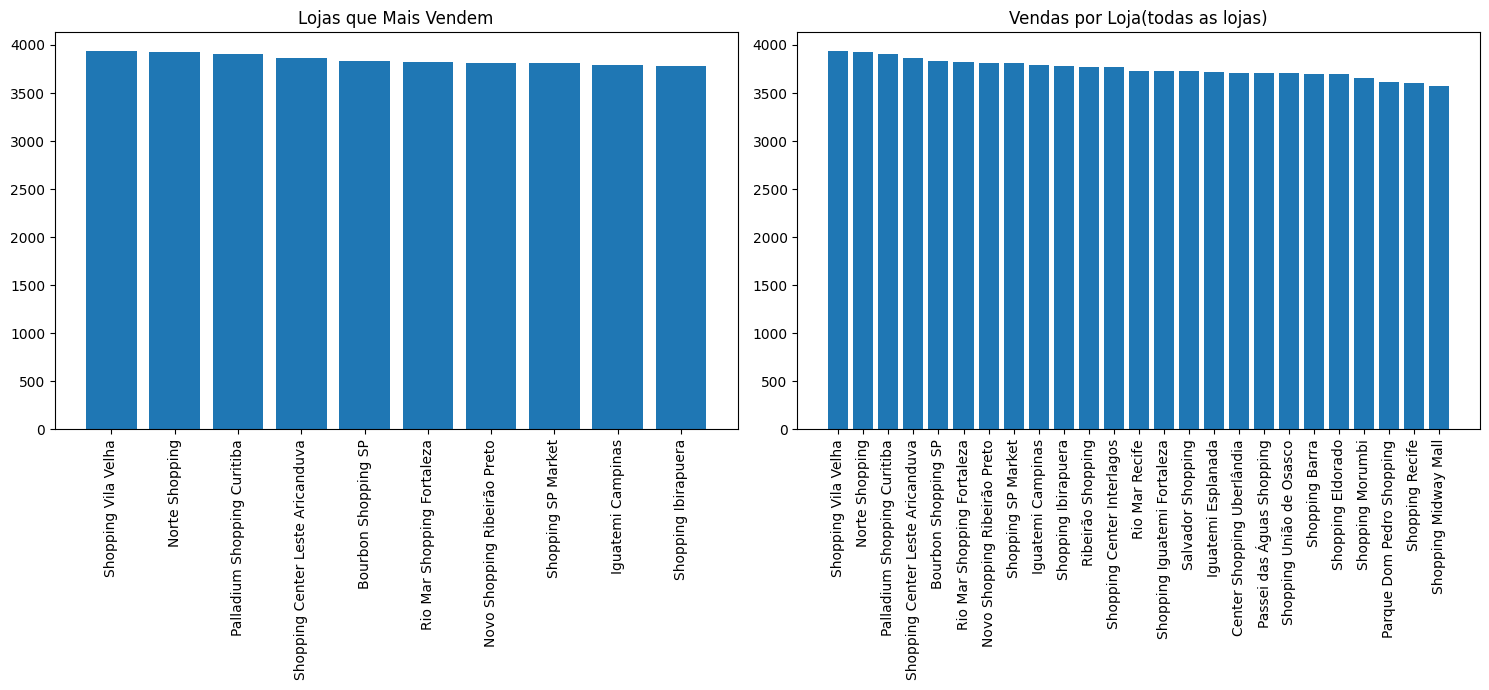

In [72]:
#transformando em gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
graf_dados = df.groupby('id_loja').count().valor_final.sort_values(ascending=False).head(10)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Lojas que Mais Vendem')

plt.subplot(1,2,2)
graf_dados = df.groupby('id_loja').count().valor_final.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas por Loja(todas as lojas)')

plt.tight_layout()

##Lojas com maiores receitas

In [83]:
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False).head(10)
graf_dados

id_loja
Shopping Vila Velha                 1615271
Iguatemi Campinas                   1612460
Shopping SP Market                  1610930
Norte Shopping                      1610477
Palladium Shopping Curitiba         1600499
Bourbon Shopping SP                 1600260
Shopping Center Leste Aricanduva    1596714
Iguatemi Esplanada                  1596339
Ribeirão Shopping                   1594186
Rio Mar Recife                      1582897
Name: valor_final, dtype: int64

Text(0.5, 1.0, 'Todas as Lojas')

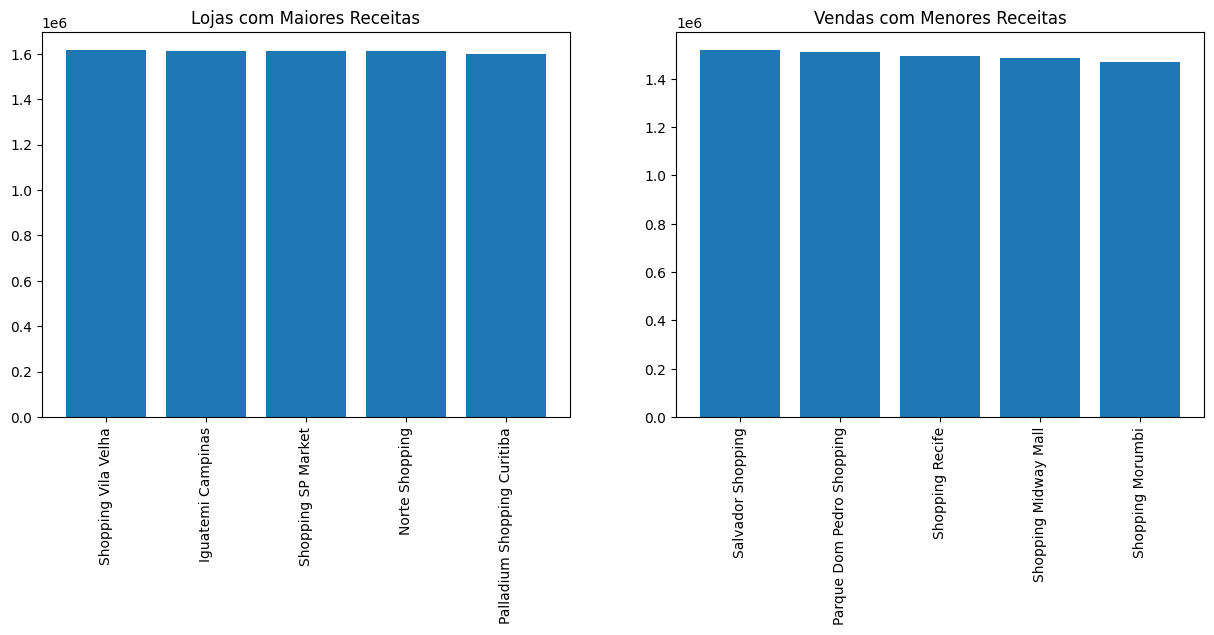

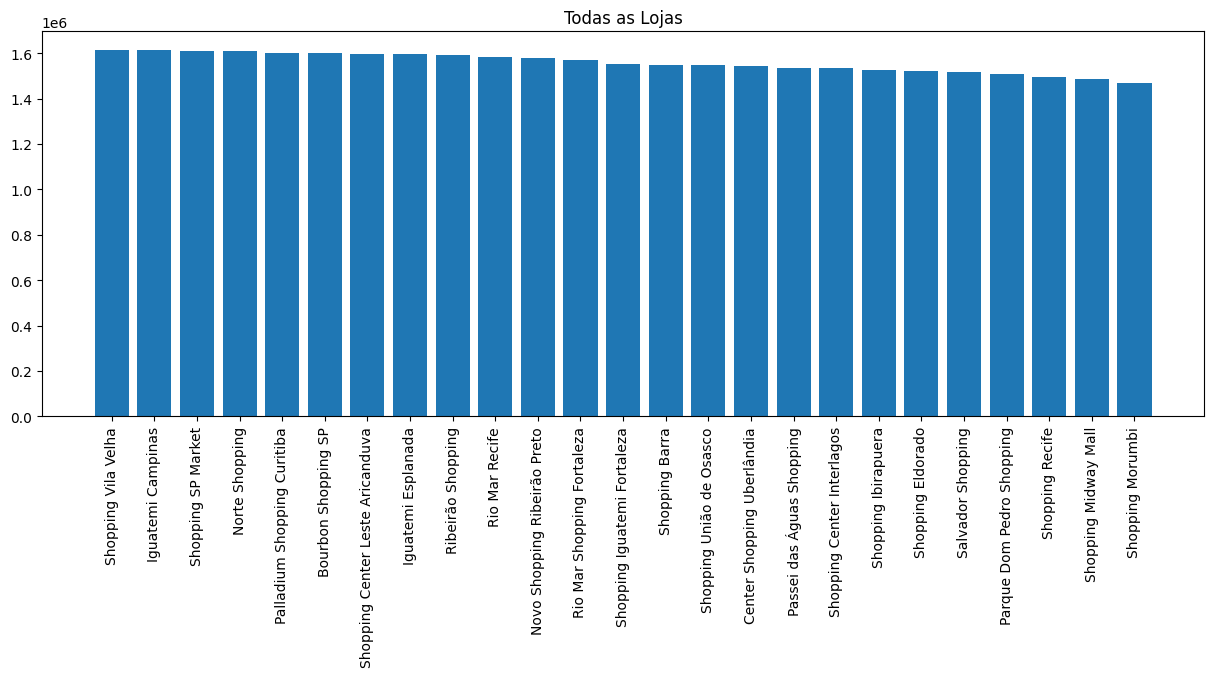

In [98]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False).head(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Lojas com Maiores Receitas')

plt.subplot(1,2,2)
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False).tail(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas com Menores Receitas')

# plt.tight_layout()

plt.figure(figsize=(15,5))
graf_dados = df[['id_loja', 'valor_final']].groupby('id_loja').sum().valor_final.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Todas as Lojas')

##Produtos que mais vendem

In [75]:
graf_dados = df.groupby('produto').count().valor_final.sort_values(ascending=False).head(10)
graf_dados

produto
Bermuda Linho        857
Mochila Liso         854
Pulseira Liso        851
Relógio Listrado     847
Cueca                840
Calça Xadrez         828
Short Linho          826
Pulseira Listrado    825
Casaco Liso          825
Pulseira Estampa     819
Name: valor_final, dtype: int64

Text(0.5, 1.0, 'Vendas por produtos')

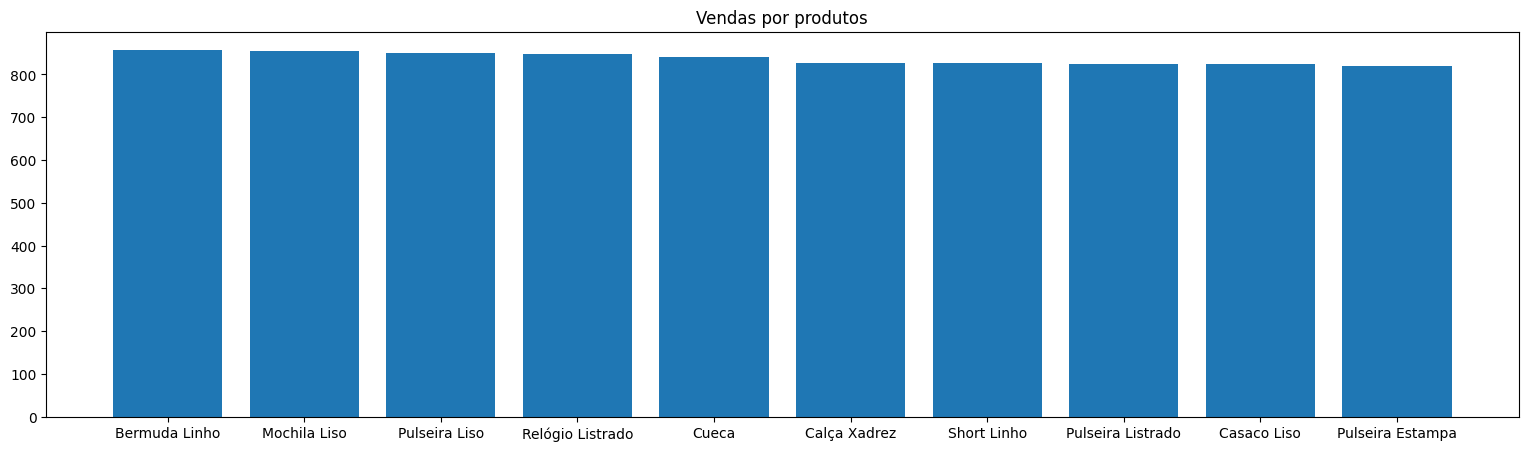

In [77]:
plt.figure(figsize=(19,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produtos')

##Receita por Produto

In [99]:
graf_dados = df[['produto', 'valor_final']].groupby('produto').sum().valor_final.sort_values(ascending=False)
graf_dados

produto
Terno Listrado    1215935
Terno Linho       1203000
Terno Liso        1199520
Terno Xadrez      1169850
Terno Estampa     1135954
                   ...   
Meia Estampa        88400
Meia Xadrez         64944
Meia Liso           62358
Meia Listrado       59496
Meia                51450
Name: valor_final, Length: 120, dtype: int64

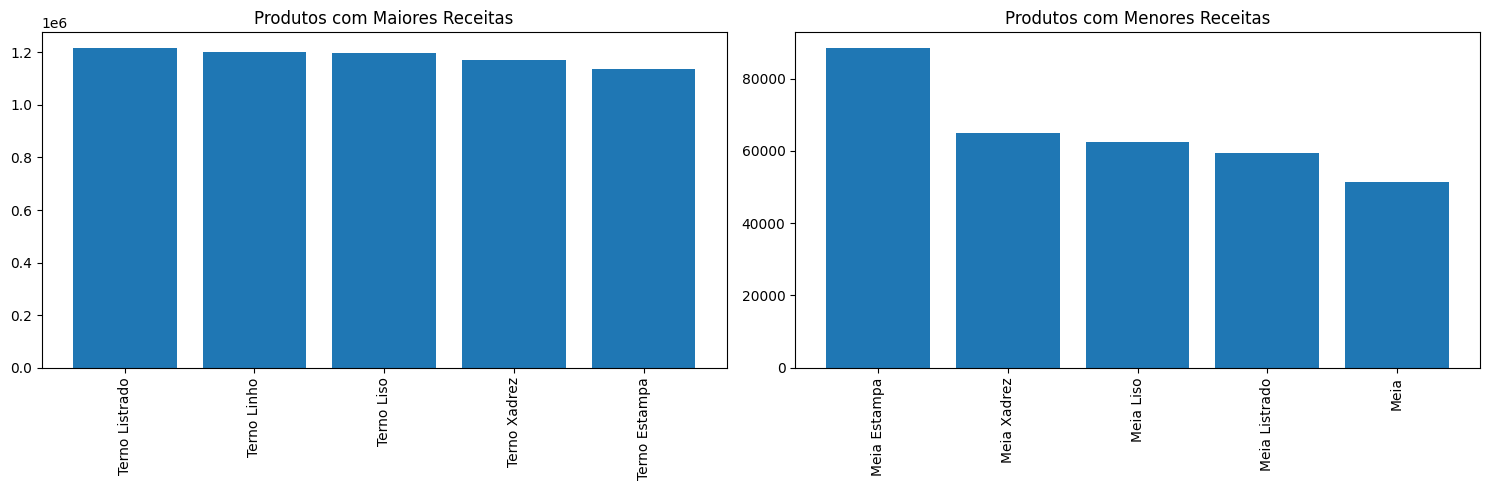

In [102]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
graf_dados = df[['produto', 'valor_final']].groupby('produto').sum().valor_final.sort_values(ascending=False).head(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Produtos com Maiores Receitas')

plt.subplot(1,2,2)
graf_dados = df[['produto', 'valor_final']].groupby('produto').sum().valor_final.sort_values(ascending=False).tail(5)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Produtos com Menores Receitas')

# plt.tight_layout()


# **Análise de Tempo**

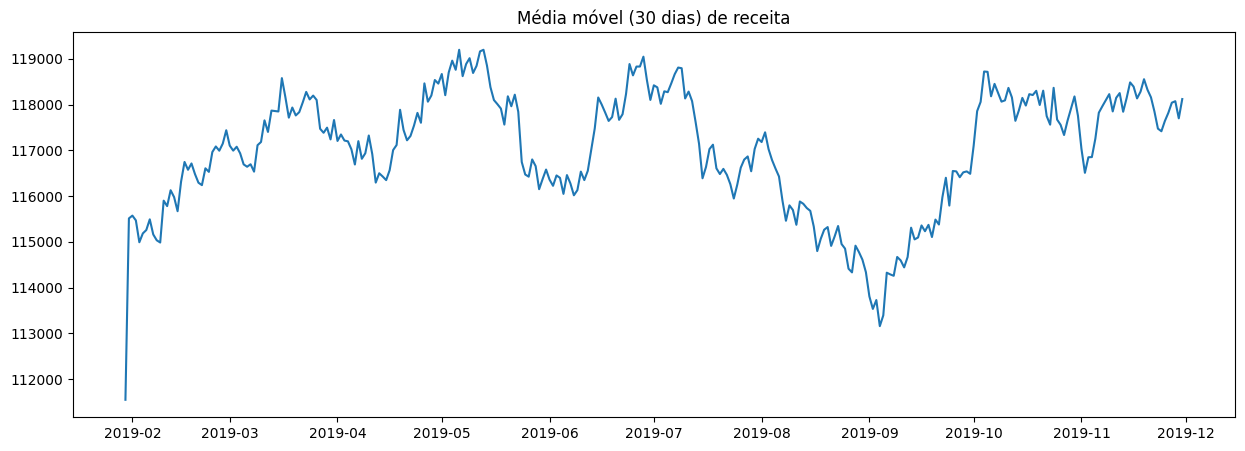

In [106]:
plt.figure(figsize=(15,5))
graf_dados = df[['valor_final','data']].groupby('data').sum().rolling(30).mean()
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()